<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp?scriptVersionId=125025313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа

Ранжируем акций из списка голубых фишек Московской биржи по коэффициенту Шарпа для абсолютных курсов. Абсолютные курсы для акций получаем умножением рублевого курса акции на абсолютный курс рубля (данные берем из тетрадки https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki). Ранжирование позволяет выявить самые выгодные для вложения акции. Рейтинги считаем для разных временных промежутков от месяца до 5 лет. 

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

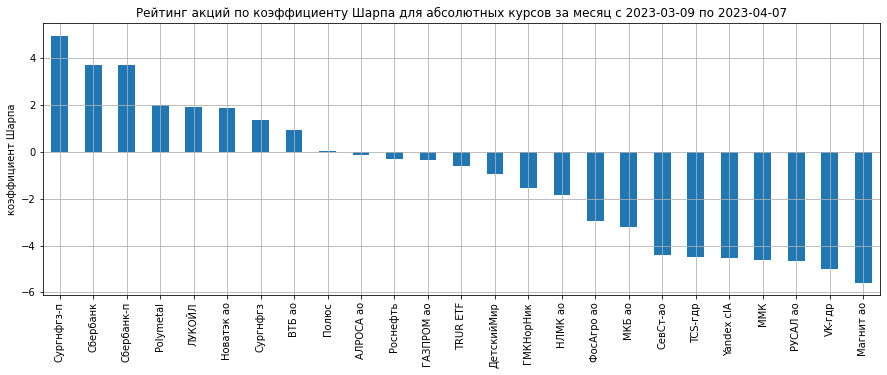

# За квартал

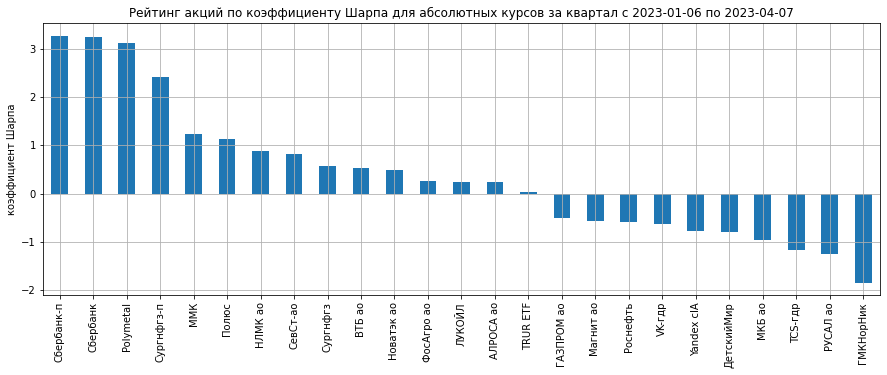

# За полгода

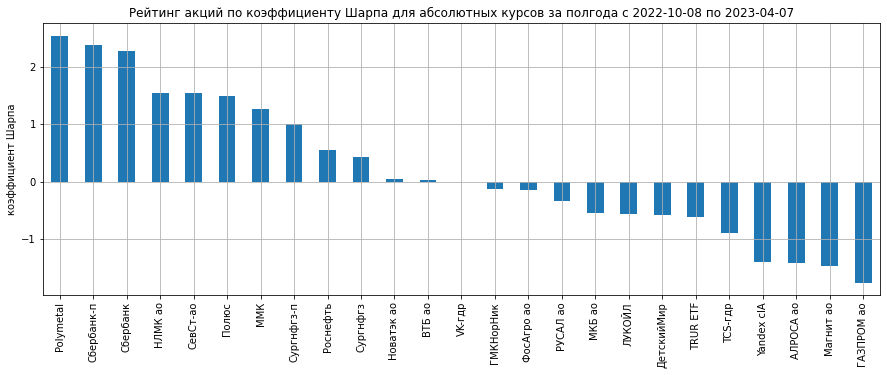

# За год

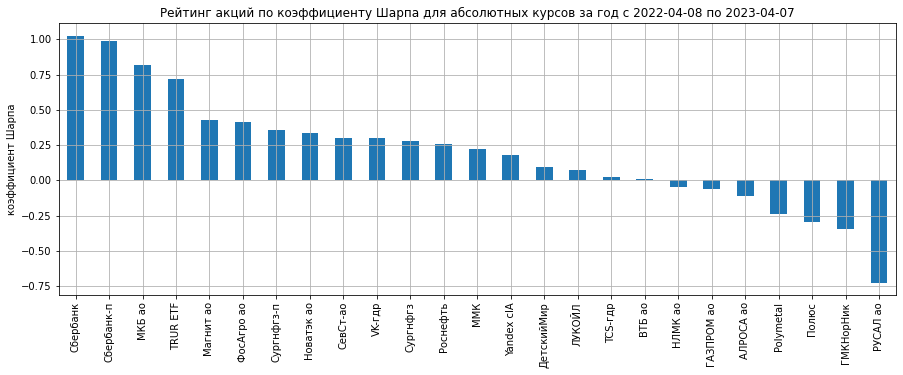

# За 2 года

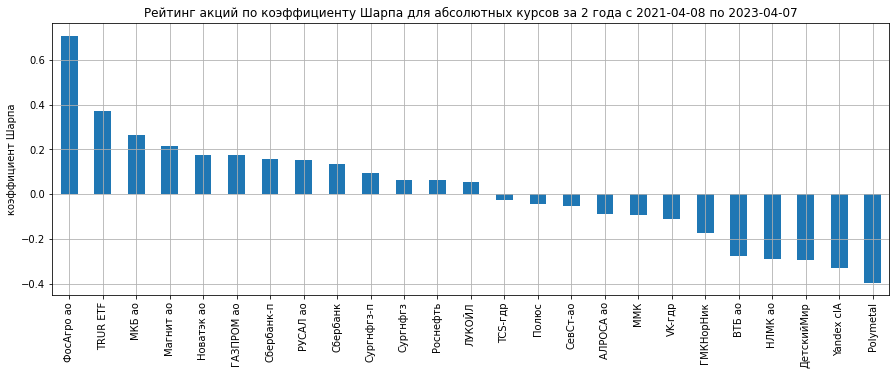

# За 3 года

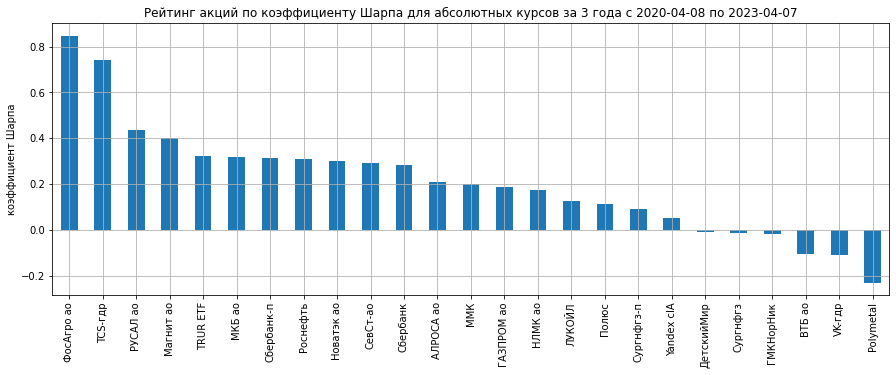

# За 5 лет

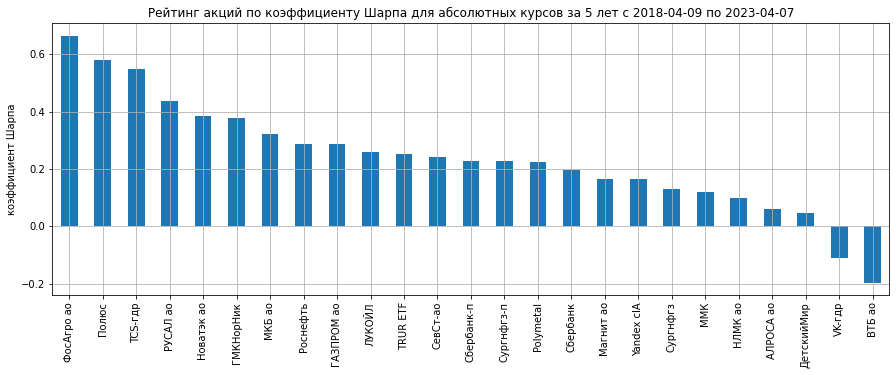

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы акций подкачиваем
s_abs = pd.read_csv("/kaggle/input/mmvb-abscur-blue-fishki/s_abscur.csv",index_col=0,parse_dates=['Date'])

# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []
for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_abs.asfreq(freq="D").index[-per]
    date_finish = s_abs.index[-1]
    
    res = sharpe_ratio(s_abs[s_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг акций по коэффициенту Шарпа для абсолютных курсов за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt)+".png")
    plt.show()
    cnt += 1
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp")